Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Linearni diskriminativni modeli

*Verzija: 1.0  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **31. listopada 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od dva zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [174]:
# Učitaj osnovne biblioteke...
import sklearn
import numpy as np
import matplotlib.pyplot as plt
% pylab inline

In [186]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None:
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h, XX)))
            else:
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h, XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [187]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [188]:
seven_X = np.array([[2, 1], [2, 3], [1, 2], [3, 2], [5, 2], [5, 4], [6, 3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost modela klasifikacija linearnom regresijom: 1.0


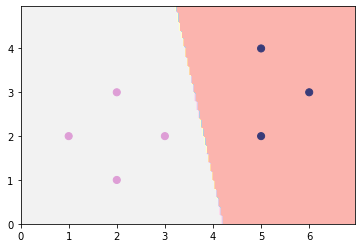

In [189]:
# Vaš kôd ovdje

lin_reg = RidgeClassifier(0).fit(seven_X, seven_y)

# lin_reg_w = [lin_reg.intercept_[0]]
# lin_reg_w.extend(lin_reg.coef_[0])
#
# print('w=', lin_reg_w)
print('Točnost modela klasifikacija linearnom regresijom:', accuracy_score(seven_y, lin_reg.predict(seven_X)))

h = lambda x: lin_reg.predict(x) >= 0.5

plot_2d_clf_problem(seven_X, seven_y, h)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost modela klasifikacija linearnom regresijom ali bez fancy funkcije: 1.0


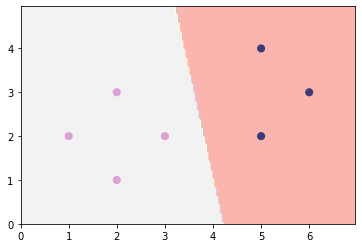

In [190]:
# Vaš kôd ovdje

lin_reg_2 = LinearRegression().fit(seven_X, seven_y)

# lin_reg_2_w = [lin_reg_2.intercept_]
# lin_reg_2_w.extend(lin_reg_2.coef_)
# print('w=', lin_reg_2_w)

h_2 = lambda x: lin_reg_2.predict(x) >= 0.5

print('Točnost modela klasifikacija linearnom regresijom ali bez fancy funkcije:',
      accuracy_score(seven_y, list(map(lambda x: 1 if x else 0, h_2(seven_X)))))

plot_2d_clf_problem(seven_X, seven_y, h_2)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [191]:
outlier_X = np.append(seven_X, [[12, 8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost modela klasifikacija linearnom regresijom: 0.875


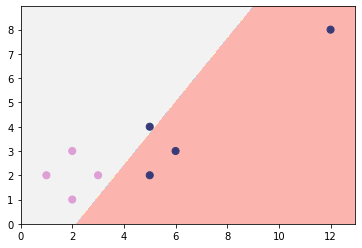

In [192]:
# Vaš kôd ovdje

lin_reg_3 = RidgeClassifier(0).fit(outlier_X, outlier_y)

print('Točnost modela klasifikacija linearnom regresijom:', accuracy_score(outlier_y, lin_reg_3.predict(outlier_X)))

h_3 = lambda x: lin_reg_3.predict(x) >= 0.5

plot_2d_clf_problem(outlier_X, outlier_y, h_3)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [193]:
unsep_X = np.append(seven_X, [[2, 2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost modela klasifikacija linearnom regresijom: 0.875


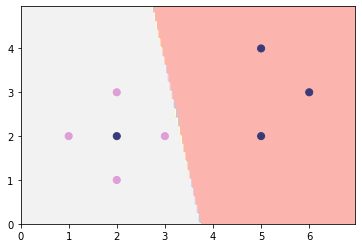

In [194]:
# Vaš kôd ovdje

lin_reg_4 = RidgeClassifier(0).fit(unsep_X, unsep_y)

print('Točnost modela klasifikacija linearnom regresijom:', accuracy_score(unsep_y, lin_reg_4.predict(unsep_X)))

h_4 = lambda x: lin_reg_4.predict(x) >= 0.5

plot_2d_clf_problem(unsep_X, unsep_y, h_4)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

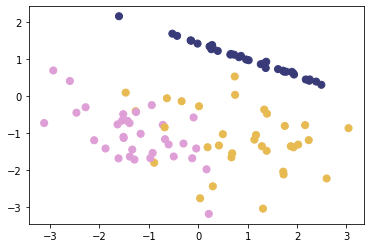

In [195]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje

X, y = make_classification(n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'RidgeClassifier')

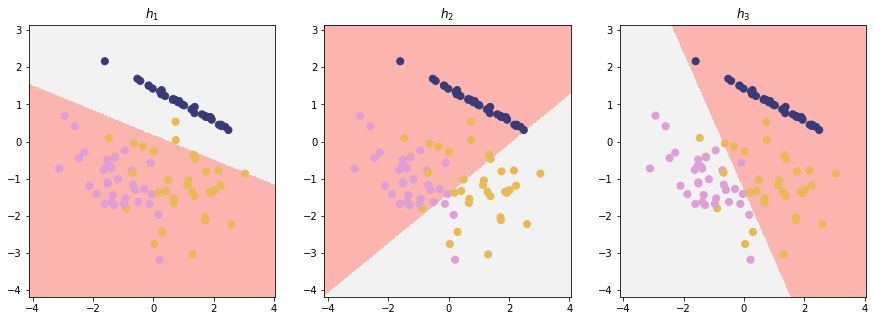

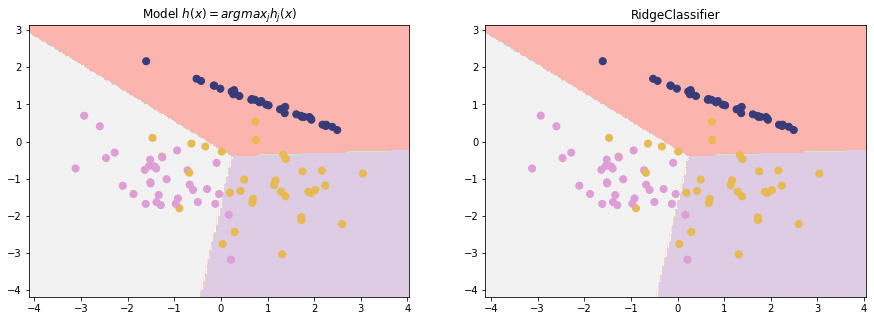

In [196]:
# Vaš kôd ovdje

decision_functions = []

plt.figure(figsize=(15, 5))
for group in set(y):
    y_group = list(map(lambda x: 1 if x == group else 0, y))

    ridge_classifier = RidgeClassifier(0).fit(X, y_group)

    decision_functions.append(ridge_classifier.decision_function)

    h_group = lambda x: ridge_classifier.predict(x) >= 0.5

    plt.subplot(1, len(set(y)), group + 1)
    plot_2d_clf_problem(X, y, h_group)
    plt.title('$h_{}$'.format(group + 1))


plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
h_argmax = lambda x: np.argmax([fun(x.reshape(1, -1)) for fun in decision_functions])
plot_2d_clf_problem(X, y, h_argmax)
plt.title('Model $h(x) = argmax_jh_j(x)$')

plt.subplot(1,2,2)
ridge_classifier = RidgeClassifier(0).fit(X,y)
plot_2d_clf_problem(X,y, lambda x: ridge_classifier.predict(x))
plt.title('RidgeClassifier')